# Preparation

In [4]:
!curl -o teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 37048  100 37048    0     0  34367      0  0:00:01  0:00:01 --:--:-- 34367


In [5]:
import pandas as pd
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


How many instances of each class do we have?

In [15]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Visualize income by splitting it in bins and count how much is inside each one of those bins:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115cc75f8>]],
      dtype=object)

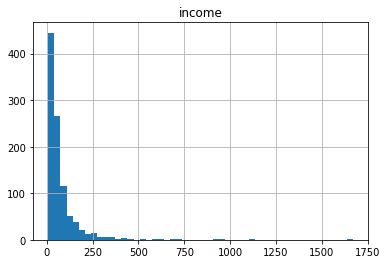

In [17]:
df.hist(column='income', bins=50)

# Building Sets for Training

In [19]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

## Feature Set

In [23]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

## Category Set

In [22]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

## Normalize Data

In [26]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# Classification

In [31]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [32]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [33]:
yhat = neigh.predict(X_test)
print(np.concatenate([yhat[0:5, None], y[0:5, None]], axis=1))
# np.concatenate([yhat[0:5].T, y[0:5].T], axis=1)
match = yhat == y_test
sum(match)/len(match) # the probability of guessing right

[[1 1]
 [1 4]
 [3 3]
 [2 1]
 [4 3]]


0.32

In [34]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[23,  9, 13,  6],
       [ 9, 16,  9, 10],
       [22, 12, 16,  4],
       [20, 11, 11,  9]])

# Practice

In [36]:
import pandas as pd
df = pd.read_csv('teleCust1000t.csv')

X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
y = df['custcat'].values # it is an array, not a matrix, to have matrix: df[['custcat']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=6)


from sklearn.neighbors import KNeighborsClassifier
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_hat = neigh.predict(X_test)

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))
metrics.confusion_matrix(y_test, y_hat)

Train set Accuracy:  0.50625
Test set Accuracy:  0.245


array([[22, 15, 21,  4],
       [20,  9, 11,  6],
       [15, 16, 11,  6],
       [18, 11,  8,  7]])

In [61]:
def KNN(k):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    y_hat = neigh.predict(X_test)
    print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

In [62]:
m = map(KNN, range(1,11))

In [63]:
list(m)

Train set Accuracy:  1.0
Test set Accuracy:  0.325
Train set Accuracy:  0.6375
Test set Accuracy:  0.3
Train set Accuracy:  0.59625
Test set Accuracy:  0.3
Train set Accuracy:  0.53625
Test set Accuracy:  0.29
Train set Accuracy:  0.51625
Test set Accuracy:  0.255
Train set Accuracy:  0.50625
Test set Accuracy:  0.245
Train set Accuracy:  0.51625
Test set Accuracy:  0.245
Train set Accuracy:  0.505
Test set Accuracy:  0.255
Train set Accuracy:  0.4975
Test set Accuracy:  0.26
Train set Accuracy:  0.4825
Test set Accuracy:  0.265


[None, None, None, None, None, None, None, None, None, None]

In [64]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.325, 0.3  , 0.3  , 0.29 , 0.255, 0.245, 0.245, 0.255, 0.26 ])

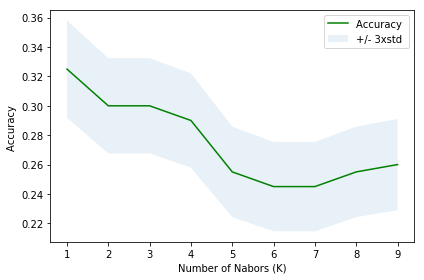

In [68]:
from matplotlib import pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [70]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy was with 0.325 with k = 1
